In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline
import os
from scipy.stats import gaussian_kde
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
if os.environ['COMPUTERNAME'] == 'DESKTOP-EQAO3M5':
  computer_flag = 'home'
else:
  computer_flag = 'office'

if computer_flag == 'home':
  file_dir = "F:/github/pythonScript/seafog/"
else:
  file_dir = "H:/github/python/seafog/"

In [9]:
file_59754 = os.path.normpath(os.path.join(file_dir, './data/station/59754.20130101-2022093023.csv'))
df_59754 = pd.read_csv(file_59754,sep=',',na_values=[9999])
df_59754.index = pd.to_datetime(df_59754["DDATETIME"])
df_59754["DDATETIME"] = pd.to_datetime(df_59754["DDATETIME"])
df_code = pd.read_csv(os.path.normpath(os.path.join(file_dir, './code_readme.csv')),sep=',')

C:\Users\Henry\AppData\Local\Temp\ipykernel_5128\2697236391.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_59754 = pd.read_csv(file_59754,sep=',',na_values=[9999])


In [4]:
code_info = {
  'vis01':'V20059',
  'vis_01min':'V20001_701_01',
  'vis_10min':'V20001_701_10',
  'vis':'V20001',
  'td': 'V12003',
  't2m': 'V12001',
  "year":"V04001",
  "month": "V04002",
  "day": "V04003",
  "hour":"V04004",
  "minute":"V04005",
  "rhum":"V13003",
  'rain01':'V13019',
}

In [5]:
# 筛选雾出现的行

df_fog = df_59754.loc[df_59754[code_info['vis_01min']]<=1000]
df_fog = df_fog.loc[df_fog[code_info['rain01']] < 1].loc[df_fog[code_info['rhum']] > 90]
print(df_fog)


                                 DDATETIME  V01301               D_RYMDHM  \
DDATETIME                                                                   
2013-02-01 19:00:00  2013-02-01 19:00:00.0   59754  2013-02-03 00:20:15.0   
2013-02-01 20:00:00  2013-02-01 20:00:00.0   59754  2013-02-03 00:20:20.0   
2013-02-01 23:00:00  2013-02-01 23:00:00.0   59754  2013-02-01 23:08:41.0   
2013-02-03 15:00:00  2013-02-03 15:00:00.0   59754  2013-02-03 15:06:56.0   
2013-02-03 16:00:00  2013-02-03 16:00:00.0   59754  2013-02-03 16:05:45.0   
...                                    ...     ...                    ...   
2022-03-13 21:00:00  2022-03-13 21:00:00.0   59754  2022-08-20 06:44:33.0   
2022-03-14 23:00:00  2022-03-14 23:00:00.0   59754  2022-08-20 07:11:30.0   
2022-03-15 00:00:00  2022-03-15 00:00:00.0   59754  2022-08-20 07:12:30.0   
2022-03-16 21:00:00  2022-03-16 21:00:00.0   59754  2022-08-20 08:03:30.0   
2022-04-21 22:00:00  2022-04-21 22:00:00.0   59754  2022-08-20 19:42:00.0   

In [6]:
df_fog["DDATETIME"] = pd.to_datetime(df_fog["DDATETIME"])

In [7]:
df_year_count = df_fog.groupby(df_fog["DDATETIME"].dt.year).count()
print(df_year_count)

           DDATETIME  V01301  D_RYMDHM  D_IYMDHM  V04001  V04002  V04003  \
DDATETIME                                                                  
2013              62      62        62        62      62      62      62   
2014             129     129       129       129     129     129     129   
2015              63      63        63        63      63      63      63   
2016              63      63        63        63      63      63      63   
2017              38      38        38        38      38      38      38   
2018              86      86        86        86      86      86      86   
2019              15      15        15        15      15      15      15   
2020               8       8         8         8       8       8       8   
2021             122     122       122       122     122     122     122   
2022              16      16        16        16      16      16      16   

           V04004  V04005  V05001  ...  V13925  V13930  V13935  V13940  \
DDATETIME    

In [12]:
df_year_count['DDATETIME']

DDATETIME
2013     62
2014    129
2015     63
2016     63
2017     38
2018     86
2019     15
2020      8
2021    122
2022     16
Name: DDATETIME, dtype: int64

In [10]:
df_year_count.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='DDATETIME')

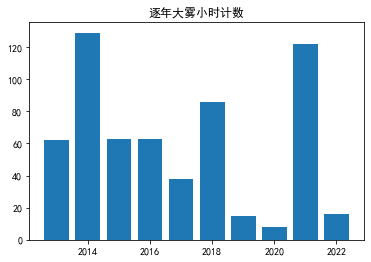

In [8]:
plt.bar(df_year_count.index, df_year_count['DDATETIME'])
plt.title('逐年大雾小时计数')
plt.show()

In [12]:
df_59754["DDATETIME"].dt.month.max()

12

In [16]:
df_59754_JanFeb =  df_59754.loc[(df_59754["DDATETIME"].dt.month==1) | (df_59754["DDATETIME"].dt.month==2)]
df_59754_JanFeb_mean = df_59754_JanFeb.groupby(df_59754["DDATETIME"].dt.year).mean()

In [18]:
df_59754_JanFeb_mean[code_info['t2m']]

DDATETIME
2013    20.466376
2014    17.059703
2015    18.601556
2016    16.579792
2017    18.661017
2018    17.037896
2019    20.890537
2020    20.341737
2021    17.728481
2022    18.152833
Name: V12001, dtype: float64

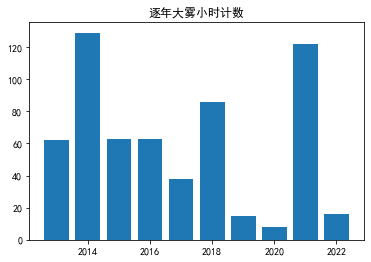

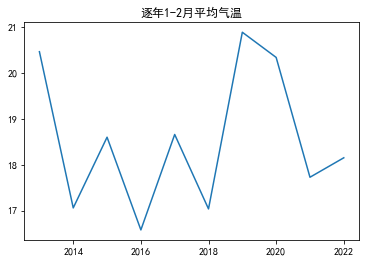

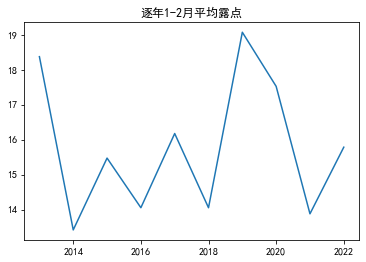

In [19]:
plt.bar(df_year_count.index, df_year_count['DDATETIME'])
plt.title('逐年大雾小时计数')
plt.show()
plt.plot(df_59754_JanFeb_mean.index, df_59754_JanFeb_mean[code_info['t2m']])
plt.title('逐年1-2月平均气温')
plt.show()
plt.plot(df_59754_JanFeb_mean.index, df_59754_JanFeb_mean[code_info['td']])
plt.title('逐年1-2月平均露点')
plt.show()

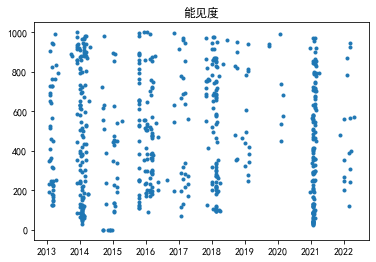

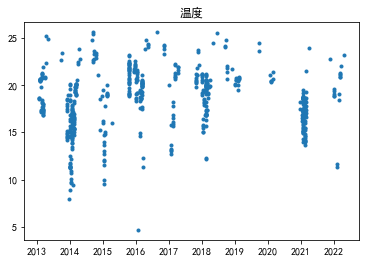

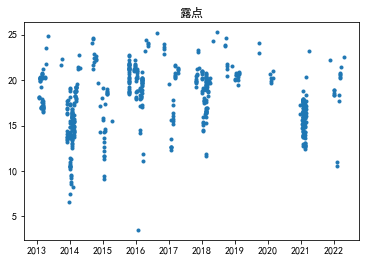

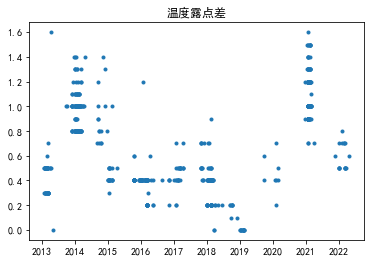

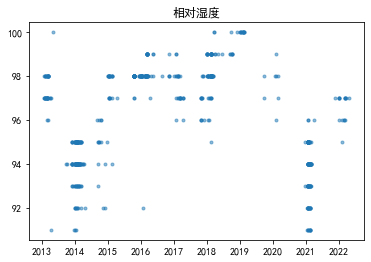

In [7]:
plt.plot(df_fog.index, df_fog[code_info['vis_01min']], '.')
plt.title('能见度')
plt.show()
plt.plot(df_fog.index, df_fog[code_info['t2m']], '.')
plt.title('温度')
plt.show()
plt.plot(df_fog.index, df_fog[code_info['td']], '.')
plt.title('露点')
plt.show()
plt.plot(df_fog.index, df_fog[code_info['t2m']]-df_fog[code_info['td']], '.')
plt.title('温度露点差')
plt.show()
plt.plot(df_fog.index, df_fog[code_info['rhum']], '.', alpha=0.5)
plt.title('相对湿度')
plt.show()

<AxesSubplot:title={'center':'雾频次月份统计'}>

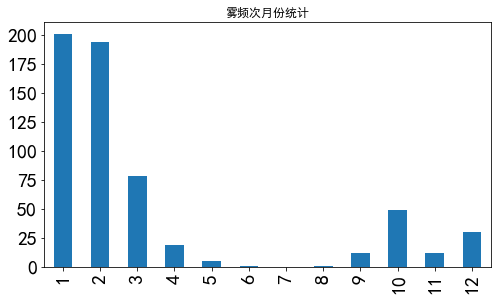

In [32]:
month_count = df_fog[code_info["month"]].value_counts().sort_index()
# print(month_count)
for index in range(12):
    month = index + 1
    if(month not in month_count.index):
      month_count.loc[month] = 0
month_count = month_count.sort_index()
month_count.plot.bar(title='雾频次月份统计', figsize=(8, 4.5), fontsize=20)

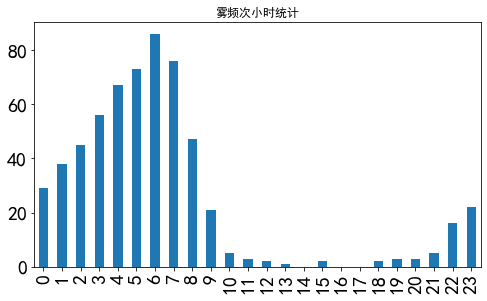

In [33]:
hour_count = df_fog[code_info["hour"]].value_counts().sort_index()
# hour_count.plot.bar()
# plt.show()
BJ_hour_count = pd.Series(np.arange(0,24))
for index in range(len(BJ_hour_count)):
    utc_index = index - 8 if index - 8>=0 else index - 8 +24
    BJ_hour_count[index] = hour_count.loc[utc_index] if utc_index in hour_count.index else 0

BJ_hour_count.plot.bar(title='雾频次小时统计', figsize=(8, 4.5), fontsize=20)
plt.show()

<AxesSubplot:title={'center':'雾频次日历日统计'}>

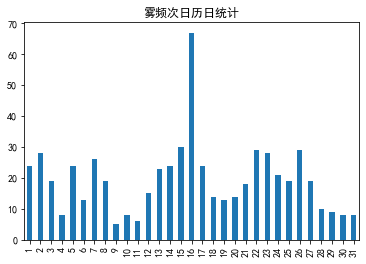

In [34]:
day_count = df_fog[code_info["day"]].value_counts().sort_index()
for index in range(31):
    day = index + 1
    if(day not in day_count.index):
      day_count.loc[day] = 0
day_count = day_count.sort_index()
day_count.plot.bar(title='雾频次日历日统计')

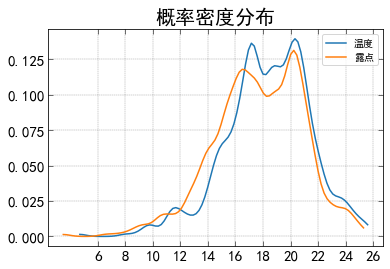

In [70]:
# 高斯分布概率密度函数
t2m = df_fog[code_info['t2m']]
eval_points = np.linspace(np.min(t2m), np.max(t2m), num = 100)
kde_sp = gaussian_kde(t2m, bw_method=0.15)
y_sp = kde_sp.pdf(eval_points)
ax = plt.subplot()
plt.plot(eval_points, y_sp)
plt.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)
ax.set_xticks([6.0,8.0,10,12,14,16,18,20,22,24,26])
data_raw = df_fog[code_info['td']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.15)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('概率密度分布', fontsize=20)
plt.legend(['温度','露点'])
plt.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线
plt.show()

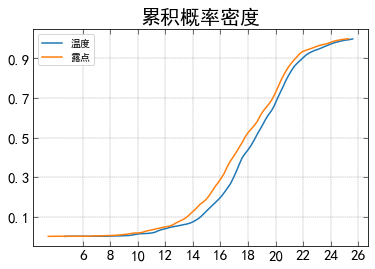

In [47]:
from scipy.special import ndtr

data_raw = df_fog[code_info['t2m']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.15)

cdf = tuple(ndtr(np.ravel(item - kde_sp.dataset) / kde_sp.factor).mean()
                for item in eval_points)

ax = plt.subplot()
ax.plot(eval_points, cdf)

data_raw = df_fog[code_info['td']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.15)

cdf = tuple(ndtr(np.ravel(item - kde_sp.dataset) / kde_sp.factor).mean()
                for item in eval_points)

plt.plot(eval_points, cdf)
ax.set_yticks([0.1,0.3,0.5,0.7,0.9])
ax.set_xticks([6.0,8.0,10,12,14,16,18,20,22,24,26])
plt.title('累积概率密度', fontsize=20)
plt.legend(['温度','露点'])
plt.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)
plt.grid(linewidth=0.4, color='k', alpha=0.45, linestyle='--')  # 开启网格线

plt.show()

In [51]:
data_raw = df_fog[code_info['t2m']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.15)

cdf = tuple(ndtr(np.ravel(item - kde_sp.dataset) / kde_sp.factor).mean()
                for item in eval_points)


In [65]:
data_raw = df_fog[code_info['td']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.15)

cdf = tuple(ndtr(np.ravel(item - kde_sp.dataset) / kde_sp.factor).mean()
                for item in eval_points)

In [68]:
print(cdf[65])
print(eval_points[65])

0.5050139382405456
17.813131313131315


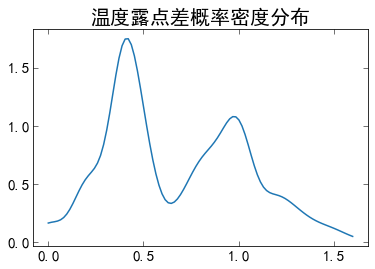

In [49]:
data_raw = df_fog[code_info['t2m']] - df_fog[code_info['td']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.2)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('温度露点差概率密度分布', fontsize=20)
plt.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)
plt.show()

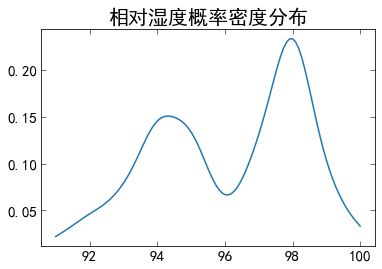

In [50]:
data_raw = df_fog[code_info['rhum']]
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.25)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('相对湿度概率密度分布', fontsize=20)
plt.tick_params(axis='both', labelsize=15, direction='in',
                       length=5, width=0.55, right=True, top=True)
plt.show()

In [15]:
ds_G7425 = pd.read_hdf(os.path.normpath(os.path.join(file_dir, './data/G7425/G7425_202012to202209.hdf')), mode='r')

In [16]:
df_fog.index

DatetimeIndex(['2013-02-01 19:00:00', '2013-02-01 20:00:00',
               '2013-02-01 23:00:00', '2013-02-03 15:00:00',
               '2013-02-03 16:00:00', '2013-02-03 18:00:00',
               '2013-02-03 19:00:00', '2013-02-03 20:00:00',
               '2013-02-03 21:00:00', '2013-02-05 16:00:00',
               ...
               '2022-03-01 18:00:00', '2022-03-02 01:00:00',
               '2022-03-04 03:00:00', '2022-03-13 19:00:00',
               '2022-03-13 20:00:00', '2022-03-13 21:00:00',
               '2022-03-14 23:00:00', '2022-03-15 00:00:00',
               '2022-03-16 21:00:00', '2022-04-21 22:00:00'],
              dtype='datetime64[ns]', name='DDATETIME', length=632, freq=None)

In [17]:
ds_G7425.index

DatetimeIndex(['2020-12-23 00:00:00', '2020-12-23 00:10:00',
               '2020-12-23 00:20:00', '2020-12-23 00:30:00',
               '2020-12-23 00:40:00', '2020-12-23 00:50:00',
               '2020-12-23 01:00:00', '2020-12-23 01:10:00',
               '2020-12-23 01:20:00', '2020-12-23 01:30:00',
               ...
               '2022-09-28 12:10:00', '2022-09-28 12:20:00',
               '2022-09-28 12:30:00', '2022-09-28 12:40:00',
               '2022-09-28 12:50:00', '2022-09-28 13:00:00',
               '2022-09-28 13:10:00', '2022-09-28 13:20:00',
               '2022-09-28 13:30:00', '2022-09-28 13:40:00'],
              dtype='datetime64[ns]', name='date', length=67520, freq=None)

In [16]:
bjtime_index = df_fog.index.to_series() + pd.Timedelta(8,unit='h')

In [17]:
inter_index = ds_G7425.index.intersection(bjtime_index)
utc_inter_index = inter_index.to_series() + pd.Timedelta(-8,unit='h')
df_fog_inter = df_fog.loc[utc_inter_index]

In [18]:
print(inter_index)

DatetimeIndex(['2020-12-28 03:00:00', '2020-12-28 07:00:00',
               '2021-01-16 01:00:00', '2021-01-16 02:00:00',
               '2021-01-16 03:00:00', '2021-01-22 21:00:00',
               '2021-01-22 22:00:00', '2021-01-22 23:00:00',
               '2021-01-23 00:00:00', '2021-01-23 01:00:00',
               ...
               '2022-02-01 08:00:00', '2022-02-01 09:00:00',
               '2022-03-02 02:00:00', '2022-03-02 09:00:00',
               '2022-03-14 04:00:00', '2022-03-14 05:00:00',
               '2022-03-15 07:00:00', '2022-03-15 08:00:00',
               '2022-03-17 05:00:00', '2022-04-22 06:00:00'],
              dtype='datetime64[ns]', name='date', length=131, freq=None)


In [19]:
ds_G7425_fogFilter = ds_G7425.loc[inter_index].dropna(subset=['SeaTemperature', 'RelativeHumidity','Temperature'])
print(ds_G7425_fogFilter)

                            ObserveTime  WindSpeed  WindDirect  Rain  \
date                                                                   
2020-12-28 03:00:00 2020-12-28 03:00:00        2.7        97.0   0.0   
2020-12-28 07:00:00 2020-12-28 07:00:00        3.4        68.0   0.0   
2021-01-16 01:00:00 2021-01-16 01:00:00        1.1        41.0   0.0   
2021-01-16 02:00:00 2021-01-16 02:00:00        0.9        44.0   0.0   
2021-01-16 03:00:00 2021-01-16 03:00:00        1.7        69.0   0.0   
...                                 ...        ...         ...   ...   
2022-03-14 05:00:00 2022-03-14 05:00:00        3.1        74.0   0.0   
2022-03-15 07:00:00 2022-03-15 07:00:00        1.8        74.0   0.0   
2022-03-15 08:00:00 2022-03-15 08:00:00        2.0        87.0   0.0   
2022-03-17 05:00:00 2022-03-17 05:00:00        3.0        56.0   0.0   
2022-04-22 06:00:00 2022-04-22 06:00:00        4.0        87.0   0.0   

                     MaxWindSpeed  MaxWindDirect  Temperature  

<AxesSubplot:xlabel='date'>

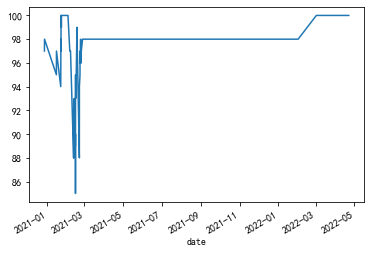

In [20]:
ds_G7425_fogFilter['RelativeHumidity'].plot()

In [21]:
rhum = ds_G7425_fogFilter['RelativeHumidity'].values*units.percent
temp = ds_G7425_fogFilter['Temperature'].values*units.degC
td = mpcalc.dewpoint_from_relative_humidity(temp, rhum)
ds_G7425_fogFilter['Dewpoint'] = td

In [22]:
ds_G7425_fogFilter['t-td'] = ds_G7425_fogFilter['Temperature'] - ds_G7425_fogFilter['Dewpoint']
ds_G7425_fogFilter['td-sst'] = ds_G7425_fogFilter['Dewpoint'] - ds_G7425_fogFilter['SeaTemperature']
ds_G7425_fogFilter['t-sst'] = ds_G7425_fogFilter['Temperature'] - ds_G7425_fogFilter['SeaTemperature']


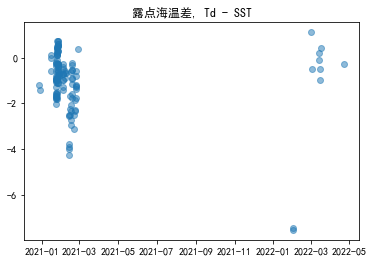

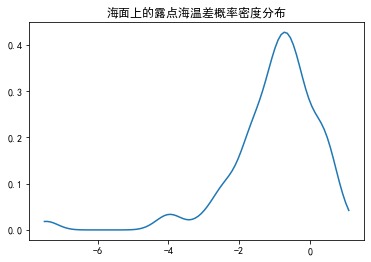

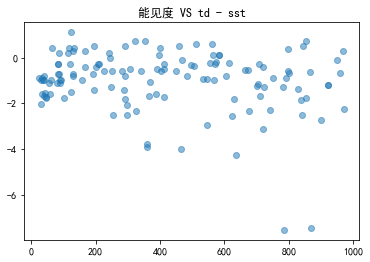

In [23]:
plt.scatter(ds_G7425_fogFilter.index, ds_G7425_fogFilter['td-sst'], marker='o',  alpha=0.5)
plt.title('露点海温差, Td - SST')
plt.show()

data_raw = ds_G7425_fogFilter['td-sst']
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.25)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('海面上的露点海温差概率密度分布')
plt.show()

plt.scatter(df_fog_inter[code_info['vis_01min']], ds_G7425_fogFilter['td-sst'], marker='o',  alpha=0.5)
plt.title('能见度 VS td - sst')
plt.show()

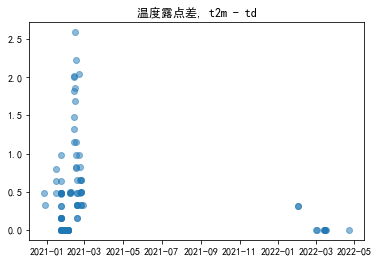

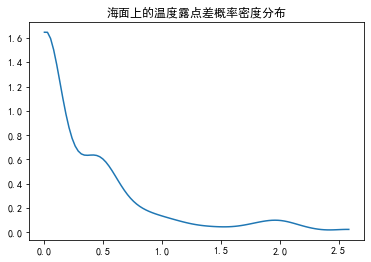

In [24]:
plt.scatter(ds_G7425_fogFilter.index, ds_G7425_fogFilter['t-td'], marker='o',  alpha=0.5)
plt.title('温度露点差, t2m - td')
plt.show()

data_raw = ds_G7425_fogFilter['t-td']
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.25)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('海面上的温度露点差概率密度分布')
plt.show()

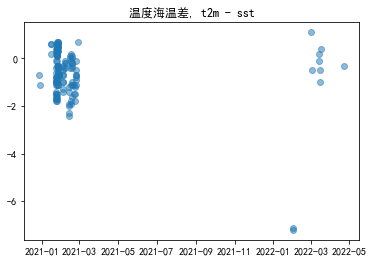

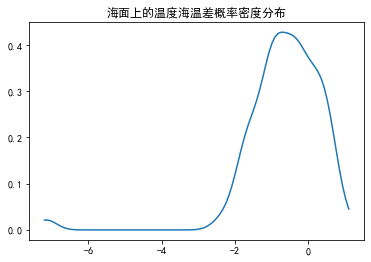

In [25]:
# 温度海温差
plt.scatter(ds_G7425_fogFilter.index, ds_G7425_fogFilter['t-sst'], marker='o',  alpha=0.5)
plt.title('温度海温差, t2m - sst')
plt.show()

data_raw = ds_G7425_fogFilter['t-sst']
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.25)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('海面上的温度海温差概率密度分布')
plt.show()

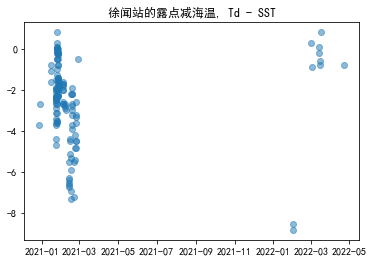

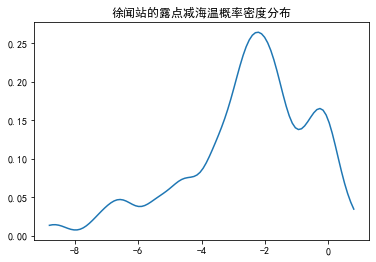

In [26]:
xuwen_td_sst = df_fog_inter[code_info['td']].values - ds_G7425_fogFilter['SeaTemperature'].values
plt.scatter(ds_G7425_fogFilter.index, xuwen_td_sst, marker='o',  alpha=0.5)
plt.title('徐闻站的露点减海温, Td - SST')
plt.show()

data_raw = xuwen_td_sst
eval_points = np.linspace(np.min(data_raw), np.max(data_raw), num = 100)
kde_sp = gaussian_kde(data_raw, bw_method=0.2)
y_sp = kde_sp.pdf(eval_points)
plt.plot(eval_points, y_sp)
plt.title('徐闻站的露点减海温概率密度分布')
plt.show()

<AxesSubplot:xlabel='date'>

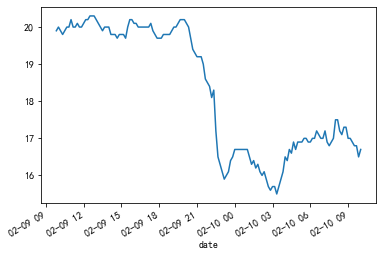

In [27]:
ds_G7425[144*47:144*48]['Temperature'].plot()